In [19]:
from google.colab import files
uploaded = files.upload()

In [20]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


User uploaded file "income.csv" with length 386 bytes


In [0]:
import pandas as pd

In [22]:
data=pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [0]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


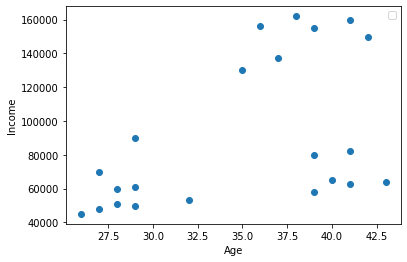

No handles with labels found to put in legend.


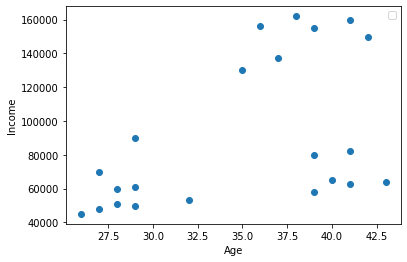

In [24]:
plt.scatter(data['Age'],data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [0]:
from sklearn.cluster import KMeans

In [26]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [27]:
data['cluster']=y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [28]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

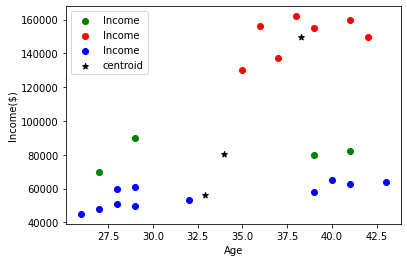

In [31]:
%matplotlib inline
d1=data[data.cluster==0]
d2=data[data.cluster==1]
d3=data[data.cluster==2]

plt.scatter(d1['Age'],d1['Income($)'],color='green',label="Income")
plt.scatter(d2['Age'],d2['Income($)'],color='red',label="Income")
plt.scatter(d3['Age'],d3['Income($)'],color='blue',label="Income")

plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

# **Data Preprocessing is necessary to have a proper clustering**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [34]:
scaler.fit(data[['Income($)']])
data['Income($)']=scaler.fit_transform(data[['Income($)']])
scaler.fit(data[['Age']])
data['Age']=scaler.fit_transform(data[['Age']])
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [37]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [0]:
data['cluster']=y_predicted

In [39]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

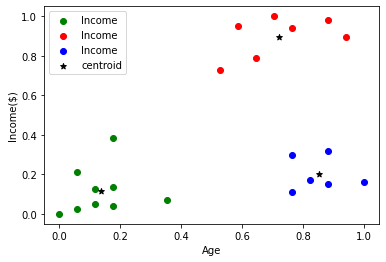

In [40]:
d1=data[data.cluster==0]
d2=data[data.cluster==1]
d3=data[data.cluster==2]

plt.scatter(d1['Age'],d1['Income($)'],color='green',label="Income")
plt.scatter(d2['Age'],d2['Income($)'],color='red',label="Income")
plt.scatter(d3['Age'],d3['Income($)'],color='blue',label="Income")

plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

# **Preaparing Elbow Method**

In [43]:
sum_squared_error=[]
kr=range(1,10)
for k in kr:
  km=KMeans(n_clusters=k)
  km.fit(data[['Age','Income($)']])
  sum_squared_error.append(km.inertia_)

sum_squared_error  

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22020960864009398,
 0.16858512236029757,
 0.1327661931978319,
 0.10188787724979426]

Text(0, 0.5, 'Sum of Squared Error')

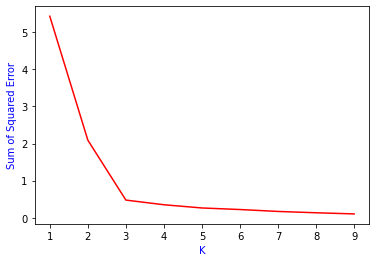

In [46]:
plt.plot(kr,sum_squared_error,color='red')
plt.xlabel('K',color='blue')
plt.ylabel('Sum of Squared Error',color='blue')
